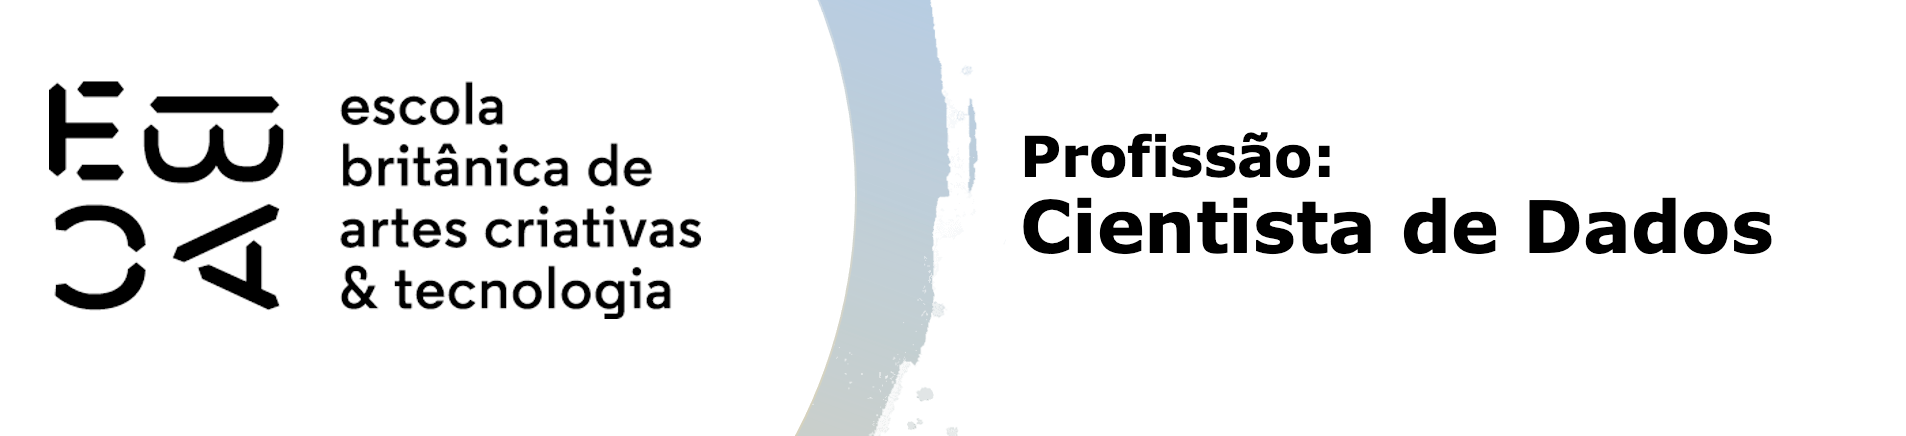

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()

In [2]:
df = pd.read_pickle('base_nfp.pkl')
df

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.00,Liberado,2021,2,0.000000,0,não definido
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Farmácia
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado


In [3]:
df_analise = df.loc[df['Data Emissão'] > '01-01-2020'].copy()
df_analise.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
100702,64.963.044/0001-08,FARMACLUB DROGARIAS LTDA,3114110,2020-06-30,179.55,2020-06-30,0.0,Liberado,2020,1,0.0,0,Farmácia
100703,00.776.574/0022-80,B2W Companhia Digital,9344628,2020-06-30,63.38,2020-06-30,0.0,Liberado,2020,1,0.0,0,não definido
100704,13.986.197/0002-02,LOJA ELECTROLUX COM VIRTUAL DE ELET,387412,2020-06-30,396.41,2020-06-30,0.0,Liberado,2020,1,0.0,0,não definido
100705,61.585.865/0703-62,RAIADROGASIL S/A,8121,2020-06-30,53.90,2020-06-30,0.0,Liberado,2020,1,0.0,0,Farmácia
100706,15.436.940/0003-67,AMAZON SERVICOS DE VAREJO DO BRASIL LTDA,5889036,2020-06-30,32.90,2020-06-30,0.0,Liberado,2020,1,0.0,0,Varejo


In [4]:
def analise(data=df_analise):
    analise = pd.DataFrame({'dtype': df_analise.dtypes, 'contagem': df_analise.count(), 'missing': df_analise.isna().sum(), 'valore_unicos': df_analise.nunique()})
    return analise

analise()

,dtype,contagem,missing,valore_unicos
CNPJ emit.,object,86932,0,16007
Emitente,object,86932,0,12193
No.,int64,86932,0,71678
Data Emissão,datetime64[ns],86932,0,730
Valor NF,float64,86932,0,28381
Data Registro,datetime64[ns],86932,0,733
Créditos,float64,86932,0,7842
Situação do Crédito,category,86932,0,2
Ano,int64,86932,0,2
Semestre,int64,86932,0,2


In [5]:
df_analise['Retorno'].fillna(0, inplace=True)
analise()

,dtype,contagem,missing,valore_unicos
CNPJ emit.,object,86932,0,16007
Emitente,object,86932,0,12193
No.,int64,86932,0,71678
Data Emissão,datetime64[ns],86932,0,730
Valor NF,float64,86932,0,28381
Data Registro,datetime64[ns],86932,0,733
Créditos,float64,86932,0,7842
Situação do Crédito,category,86932,0,2
Ano,int64,86932,0,2
Semestre,int64,86932,0,2


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [17]:
df_filtro = df_analise.loc[(df_analise['Retorno'] > 0) & (df_analise['Retorno'] < 800)]

tab = pd.crosstab(df_filtro['Retorno'], df_filtro['categoria'], margins=True, margins_name='total', normalize=True)
perc_categoria_retorno = tab.loc['total'].to_frame().sort_values(by='total')

print(f'\033[7;1mVemos que, em proporção, a categoria "Mercado"(35.31%) é a que recebe maior quantidade de Retorno de crédito.\nSeguidos da categoria "Construção"(20.16%), "não definido"(17.92%), "Farmácia"(9.60%) e "Alimentos"(9.22%)\033[0m')

perc_categoria_retorno.style.format('{:.2%}')

Vemos que, em proporção, a categoria "Mercado"(35.31%) é a que recebe maior quantidade de Retorno de crédito.
Seguidos da categoria "Construção"(20.16%), "não definido"(17.92%), "Farmácia"(9.60%) e "Alimentos"(9.22%)


,total
categoria,
Auto posto,0.36%
Vestuário,1.19%
Varejo,1.88%
Restaurantes,4.36%
Alimentos,9.22%
Farmácia,9.60%
não definido,17.92%
Construção,20.16%
Mercado,35.31%


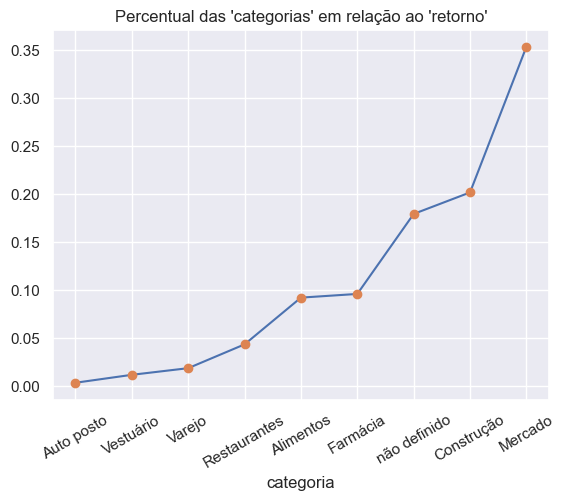

In [7]:
fig, ax = plt.subplots()

ax = sns.lineplot(perc_categoria_retorno[:-1])

plt.plot(perc_categoria_retorno.index[:-1], perc_categoria_retorno['total'][:-1], 'o')

plt.xticks(rotation=30)
plt.title("Percentual das 'categorias' em relação ao 'retorno'")
plt.legend().set_visible(False)

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

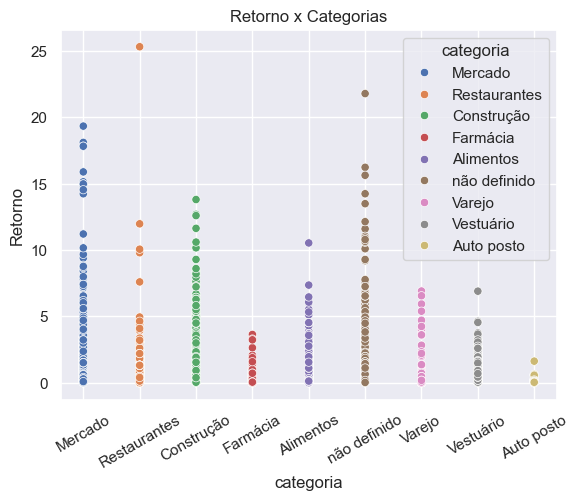

In [8]:
fig, ax = plt.subplots()

ax = sns.scatterplot(data=df_filtro,
                     x='categoria',
                     y='Retorno',
                     hue='categoria')

plt.xticks(rotation=30)
plt.title("Retorno x Categorias")
plt.legend

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [81]:
tab = pd.crosstab(df_analise['categoria'], df_analise['flag_credito'], margins=True, margins_name='total')
tab['pct_nao_evento'] = tab[0]/tab.loc['total',0]
tab['pct_evento']     = tab[1]/tab.loc['total',1]
tab['RC'] = tab['pct_evento']/tab['pct_nao_evento']
tab['WOE'] = np.log(tab['pct_evento']/tab['pct_nao_evento'])
tab.sort_values('WOE', ascending=False)

flag_credito,0,1,total,pct_nao_evento,pct_evento,RC,WOE
categoria,,,,,,,
Restaurantes,552,1625,2177,0.011124,0.043553,3.915100,1.364841
Alimentos,1605,3439,5044,0.032345,0.092171,2.849612,1.047183
Mercado,14378,13176,27554,0.289756,0.353140,1.218747,0.197824
Construção,8523,7522,16045,0.171762,0.201603,1.173733,0.160190
total,49621,37311,86932,1.000000,1.000000,1.000000,0.000000
não definido,11717,6688,18405,0.236130,0.179250,0.759117,-0.275600
Farmácia,6601,3582,10183,0.133028,0.096004,0.721680,-0.326174
Auto posto,403,135,538,0.008122,0.003618,0.445510,-0.808536
Vestuário,1477,443,1920,0.029766,0.011873,0.398889,-0.919073


Observa-se pelo WOE que há mais evidências nas categorias "Restaurantes" e "Alimentos".


Text(0.5, 1.0, "'")

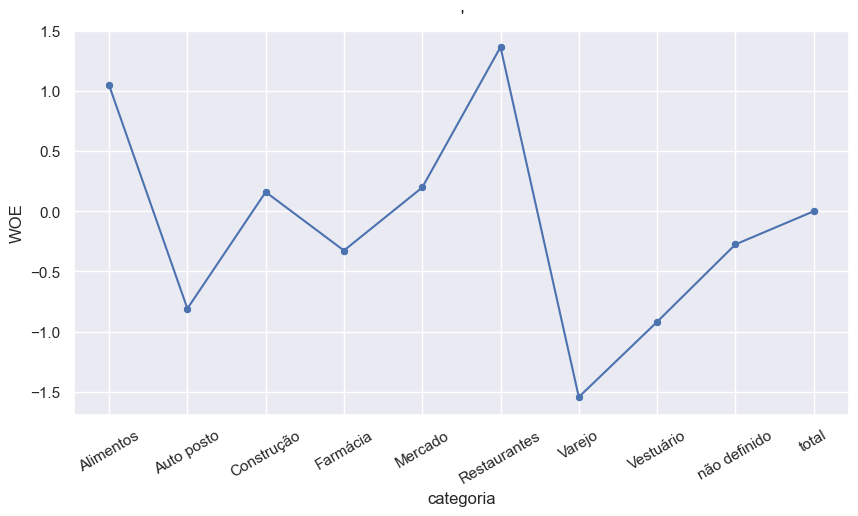

In [83]:
fig, ax = plt.subplots(figsize=(10,5))

print(f'\033[7;1mObserva-se pelo WOE que há mais evidências nas categorias "Restaurantes" e "Alimentos".')

ax = sns.lineplot(x='categoria', y='WOE', data=tab)

sns.scatterplot(x='categoria', y='WOE', data=tab, marker='o')

plt.xticks(rotation=30)
plt.title("'")

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.
